<div style="border:2px solid black; padding:10px"><center>
    
# Build Customer Personas
</center></div>

<div style="border:2px solid black; padding:10px">

Approaches to build customer personas
 - Summary statistics for each cluster
 - Snake plots
 - Calculate relative importance of cluster attributes compared to population
</div>

# Import Modules

In [1]:
# Data Manipulation Libraries: Standard dataframes and array libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# K-means clustering
from sklearn.cluster import KMeans

# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Displaying plots in jupter notebook
%matplotlib inline
# Displaying pandas columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Import data
%store -r rfm_data
%store -r dataset_log
%store -r df_normalized
%store -r dataset_cluster2
%store -r dataset_cluster3

<hr style="border-top: 2px solid black;">

### Snake plots
 - Market research technique to compare different segments
 - Visual representation of each segment's attributes
 - Need to first normalize data (center and scale)
 - Plot each clusters average normalized values of each attribute

## Snake plots for <font color="red">2-Cluster Solution</font>

In [2]:
df_normalized['Cluster'] = dataset_cluster2['Cluster']

In [3]:
df_normalized.replace({'Cluster': {0: 'One', 1: 'Two'}}, inplace=True)

In [4]:
df_melt = pd.melt(df_normalized.reset_index(),
                 id_vars=['CustomerID', 'Cluster'],
                 value_vars = ['Recency', 'Frequency', 'Monetary Value'],
                  var_name='Attribute',
                  value_name='Value'
                 )

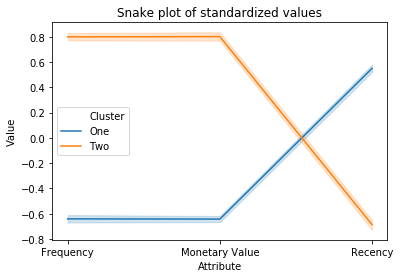

In [5]:
plt.title('Snake plot of standardized values')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_melt)
# plt.savefig("filepath/filename.format", bbox_inches='tight')
plt.show()

### Relative importance of segment attributes
 - identify relative importance of each segment's attribute
 - calculate average values of each cluster
 - calculate average values of population

In [6]:
cluster_avg = dataset_cluster2.groupby(['Cluster']).mean()
population_avg = rfm_data.mean()

In [7]:
relative_imp = cluster_avg/population_avg - 1

### Analyze and plot relative importance

 - further ratio is from 0, the more important that attribute is for a segment, relative to the total population

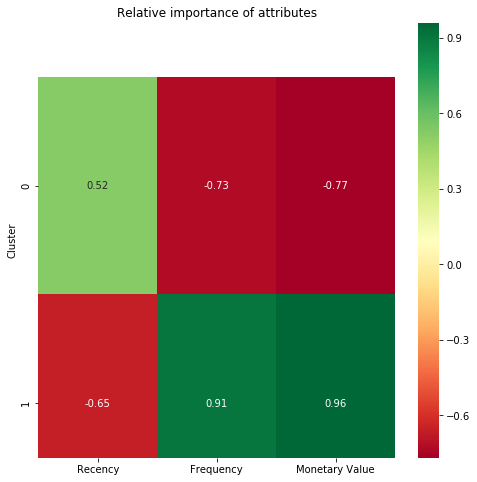

In [8]:
plt.figure(figsize=(8,8))
plt.title('Relative importance of attributes')
chart = sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
# Makes sure the plot is visible
chart.set_ylim(len(relative_imp)-0.25, -0.25)
# plt.savefig("filepath/filename.format", bbox_inches='tight')
plt.show()

<hr style="border-top: 2px solid black;">

## Snake plots for <font color="red">3-Cluster Solution</font>

In [9]:
df_normalized['Cluster'] = dataset_cluster3['Cluster']

In [10]:
df_normalized.replace({'Cluster': {0: 'One', 1: 'Two', 2:'Three'}}, inplace=True)

In [11]:
df_melt = pd.melt(df_normalized.reset_index(),
                 id_vars=['CustomerID', 'Cluster'],
                 value_vars = ['Recency', 'Frequency', 'Monetary Value'],
                  var_name='Attribute',
                  value_name='Value'
                 )

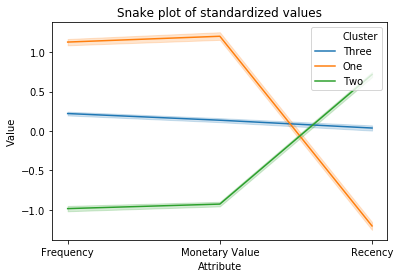

In [12]:
plt.title('Snake plot of standardized values')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_melt)
# plt.savefig("filepath/filename.format", bbox_inches='tight')
plt.show()

### Relative importance of segment attributes
 - identify relative importance of each segment's attribute
 - calculate average values of each cluster
 - calculate average values of population

In [13]:
cluster_avg = dataset_cluster3.groupby(['Cluster']).mean()
population_avg = rfm_data.mean()

In [14]:
relative_imp = cluster_avg/population_avg - 1

### Analyze and plot relative importance

 - further ratio is from 0, the more important that attribute is for a segment, relative to the total population

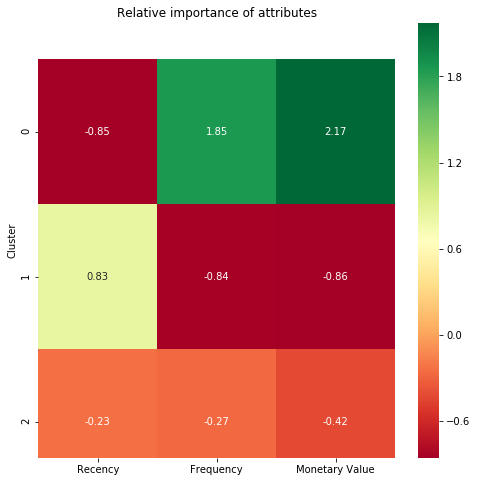

In [15]:
plt.figure(figsize=(8,8))
plt.title('Relative importance of attributes')
chart = sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
# Makes sure the plot is visible
chart.set_ylim(len(relative_imp)-0.25, -0.25)
# plt.savefig("filepath/filename.format", bbox_inches='tight')
plt.show()